In [98]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_clean = df.drop_duplicates().copy()
df_clean = df_clean.drop_duplicates(subset=['job_title','company_name','job_country'])
df_clean['job_skills'] = df_clean['job_skills'].apply(lambda skills:ast.literal_eval(skills)if pd.notna(skills)else skills)

In [101]:
job_title = 'Data Analyst'

df_clean = df_clean[df_clean['job_title_short']==job_title]
df_clean['month_no']=df_clean['job_posted_date'].dt.month
df_explode = df_clean.explode('job_skills')

df_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi...",3


In [123]:
df_pivot = df_explode.pivot_table(index='month_no',columns='job_skills',aggfunc='size', fill_value=0)
df_pivot.loc['Total'] = df_pivot.sum()
df_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month_no,,,,,,,,,,,,,,,,,,,,,
1,134,12,367,45,1,15,0,1,18,18,...,12,155,4,1193,0,5,5,0,7,65
2,108,2,287,21,0,9,1,2,20,11,...,9,143,6,807,4,1,5,0,3,29
3,118,4,284,27,0,17,4,1,13,11,...,8,133,6,796,1,1,3,1,3,34
4,88,4,258,15,0,6,7,7,6,11,...,5,111,8,775,5,2,0,0,6,14
5,87,6,184,20,0,11,5,1,4,12,...,8,83,3,625,2,3,0,0,7,12
6,105,14,243,21,0,9,4,2,12,12,...,5,117,8,779,5,4,0,0,7,24
7,145,3,245,11,0,8,3,7,14,10,...,4,122,7,695,0,3,0,0,5,31
8,127,2,265,15,0,7,6,3,10,9,...,6,131,8,863,0,0,0,0,6,29
9,89,4,228,11,0,14,0,8,10,8,...,3,111,6,704,0,1,0,0,5,16


In [127]:
df_pivot.loc['Total'].sort_values(ascending=False).head(5).index

Index(['sql', 'excel', 'python', 'tableau', 'power bi'], dtype='object', name='job_skills')

In [153]:
df_final = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).head(5).index]
df_final

job_skills,sql,excel,python,tableau,power bi
month_no,,,,,
1,7376,5490,4303,3597,2853
2,5133,3748,3084,2517,2170
3,5032,3725,3033,2587,2088
4,4732,3605,2847,2326,2069
5,4105,3022,2536,1953,1741
6,4807,3669,2891,2359,2091
7,5015,3663,3106,2502,2264
8,5681,4206,3585,2919,2579
9,4868,3527,3029,2439,2279


In [154]:
df_final = df_final.drop('Total')
df_final


job_skills,sql,excel,python,tableau,power bi
month_no,,,,,
1,7376,5490,4303,3597,2853
2,5133,3748,3084,2517,2170
3,5032,3725,3033,2587,2088
4,4732,3605,2847,2326,2069
5,4105,3022,2536,1953,1741
6,4807,3669,2891,2359,2091
7,5015,3663,3106,2502,2264
8,5681,4206,3585,2919,2579
9,4868,3527,3029,2439,2279


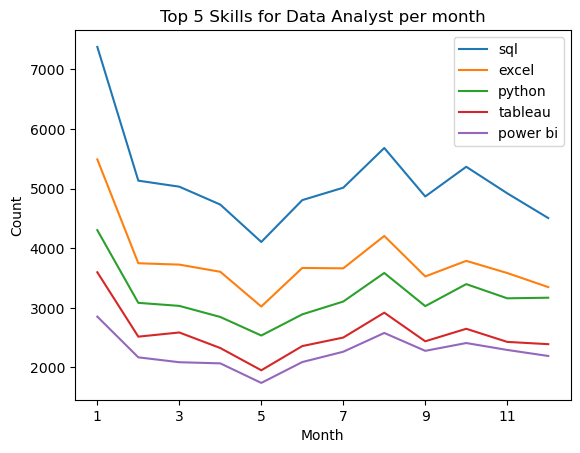

In [155]:
df_final.plot(kind='line')
plt.title(f'Top 5 Skills for {job_title} per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()